In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/Admission_Predict.csv')

In [3]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=['Serial No.'],inplace=True)

In [8]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [9]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [10]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

X_train


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,322,110,3,3.5,2.5,8.67,1
18,318,110,3,4.0,3.0,8.80,0
202,340,120,5,4.5,4.5,9.91,1
250,320,104,3,3.0,2.5,8.57,1
274,315,100,1,2.0,2.5,7.95,0
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
X_train

array([[0.64      , 0.64285714, 0.5       , ..., 0.375     , 0.59935897,
        1.        ],
       [0.56      , 0.64285714, 0.5       , ..., 0.5       , 0.64102564,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.875     , 0.99679487,
        1.        ],
       ...,
       [0.32      , 0.46428571, 0.25      , ..., 0.5       , 0.45512821,
        1.        ],
       [0.24      , 0.25      , 0.        , ..., 0.25      , 0.14423077,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.625     , 0.46474359,
        0.        ]])

In [16]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [17]:
from keras.engine import input_layer
model=Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [24]:
history=model.fit(X_train,y_train,epochs=100,validation_split=.20)

Epoch 1/100
8/8 [==============================] - 0s 13ms/step - loss: 0.0084 - val_loss: 0.0076
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0082 - val_loss: 0.0074
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0080 - val_loss: 0.0073
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0078 - val_loss: 0.0071
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 0.0070
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0075 - val_loss: 0.0069
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.0068
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0071 - val_loss: 0.0066
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0069 - val_loss: 0.0066
Epoch 11/100
8/8 [==========

In [25]:
y_pred=model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7636988927255924

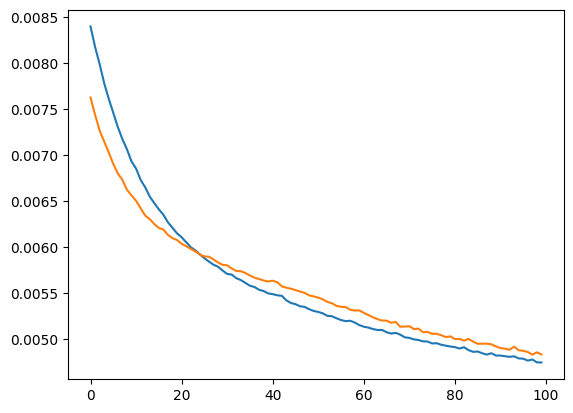

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])